# Исследование данных сервиса аренды самокатов

### Цель проекта:  
Провести анализ данных сервиса аренды самокатов GoFast и проверить гипотезы.

### Описание данных:

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

В основных данных есть информация о пользователях, их поездках и подписках.

### Исследование:
Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных
Загрузим данные для анализа:

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv') #откроем файл с данными о пользователях
except:
    users = pd.read_csv('https://code.s3.yandex.net//datasets/users_go.csv') #если не удалось, возьмем данные с сайта
    
try:
    rides = pd.read_csv('/datasets/rides_go.csv') #откроем файл с данными о поездках
except:
    rides = pd.read_csv('https://code.s3.yandex.net//datasets/rides_go.csv') #если не удалось, возьмем данные с сайта
    
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') #откроем файл с данными о подписках
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net//datasets/subscriptions_go.csv') #если не удалось, возьмем данные с сайта

Изучим первые строки в полученных датафреймах.

In [3]:
users.head(20) #прочитаем первые строки данных о пользователях

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
rides.head(20) #прочитаем первые строки данных о поездках

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
subscriptions.head() #прочитаем данные о подписках

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Изучим общую информацию о данных.

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Изучив информацию о данных можно сказать, что пропусков в данных нет. Типы данных тоже везде правильные, кроме столбца `date`. Приведем его к типу данных `datetime`.

#### Шаг 2. Предобработка данных

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') #приведем дату к типу datetime
rides.info() #проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


В датафрейм `rides` добавим новый столбец `month`, хранящий номер месяца поездки.

In [10]:
rides['month'] = rides['date'].dt.month #сохраним номер месяца в новый столбец
rides.head() #проверим результат

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Посмотрим за какой период присутствуют данные:

In [11]:
rides['date'].min() #выведем самую раннюю дату

Timestamp('2021-01-01 00:00:00')

In [12]:
rides['date'].max() #выведем самую позднюю дату

Timestamp('2021-12-30 00:00:00')

Таким образом, мы видим, что данные присутствуют ровно за год.

Проверим наличие дубликатов в датафреймах `users` и `rides`.

In [13]:
users.duplicated().sum() #проверим наличие дубликатов в датафрейме users

31

In [14]:
rides.duplicated().sum() #проверим наличие дубликатов в датафрейме rides

0

Удалим найденные дубликаты.

In [15]:
users = users.drop_duplicates().reset_index(drop=True) #удалим дубликаты и сбросим нумерацию индексов
users.duplicated().sum() #проверим результат

0

Выведем уникальные значения столбца `city` и проверим на неявные дубликаты.

In [16]:
users['city'].unique() #проверим столбец city на неявные дубликаты

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов не выявлено. 

На этапе предобработки мы изучили общую информацию о данных, удалили дубликаты, привели дату в типу datetime, провели проверку на неявные дубликаты.

Переходим к исследовательскому анализу данных.

#### Шаг 3. Исследовательский анализ данных

Визуализируем исходные данные и построим диаграммы для наглядности.

Для начала построим график распределения городов в данных.

<Axes: title={'center': 'Распределение городов'}, xlabel='Кол-во вхождений', ylabel='Название города'>

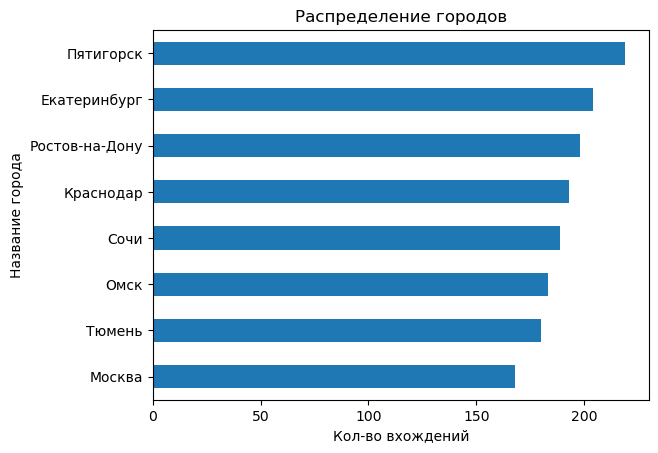

In [17]:
users['city'].value_counts().sort_values().plot(y='city', kind='barh', title='Распределение городов', xlabel='Кол-во вхождений', ylabel='Название города')

Судя по графику, города встречаются более-менее одинаково. Немного чаще встречается Пятигорск, а чуть реже Москва.

Посмотрим как часто в данных встречаются пользователи с подпиской и без:

In [18]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Построим диаграмму на основе полученных данных:

<Axes: title={'center': 'Распределение пользователей с подпиской и без'}, ylabel='Доля пользователей от общего числа, в %'>

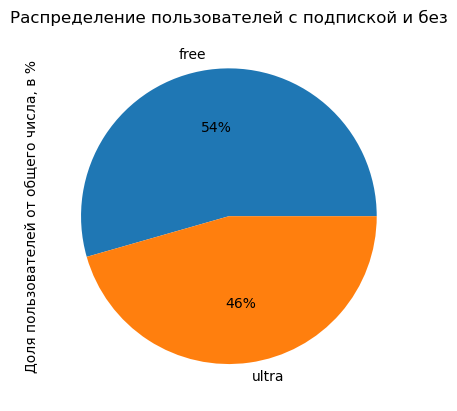

In [19]:
part_subscription_type = users['subscription_type'].value_counts() / users['subscription_type'].count() * 100
part_subscription_type.plot(kind='pie', autopct='%1.0f%%', title='Распределение пользователей с подпиской и без', label='Доля пользователей от общего числа, в %')

Судя по графику, пользователи без подписки пользуются сервисом немного чаще.

Посмотрим распределение возраста пользователей. Для начала выведем общую информацию о распределении данных в этом столбце:

In [20]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Визуализируем данные:

Text(0, 0.5, 'Кол-во человек каждого возраста')

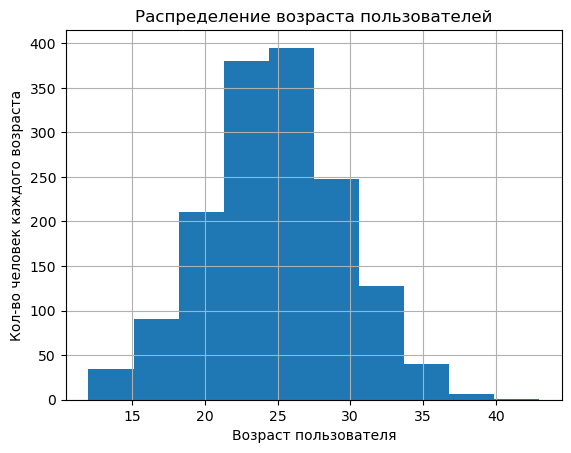

In [21]:
users['age'].hist() #гистограмма распределения пользователей разного возраста
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст пользователя')
plt.ylabel('Кол-во человек каждого возраста')

Чаще всего сервисом пользуются люди возрастом 22-28 лет (первый и третий квартиль) и реже подростки и люди старше 35 лет. Минимальный возраст - 12 лет, а максимальный - 43. Распределение близко к нормальному.

Визуализируем данные распределения расстояния каждой поездки.

Text(0, 0.5, 'Кол-во поездок')

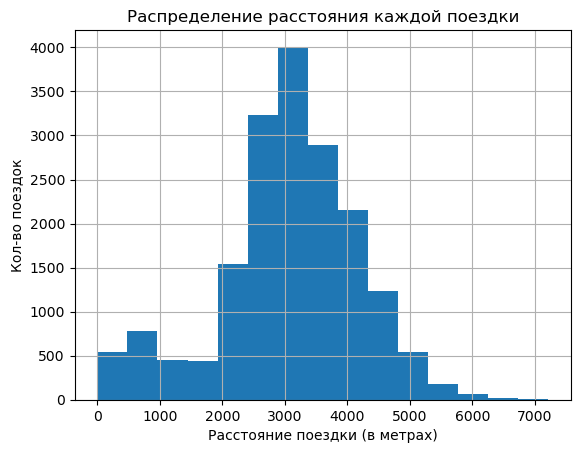

In [22]:
rides['distance'].hist(bins=15) #гистограмма расстояния, которое чаще всего люди проезжают за одну поездку
plt.title('Распределение расстояния каждой поездки')
plt.xlabel('Расстояние поездки (в метрах)')
plt.ylabel('Кол-во поездок')

Наиболее часто пользователи проезжают на самокатах 2.5-4 км. Реже всего самокаты используют для аренды на дальние расстояния (более 5 км).

Посмотрим гистограмму распределения продолжительности поездок.

Text(0, 0.5, 'Кол-во поездок')

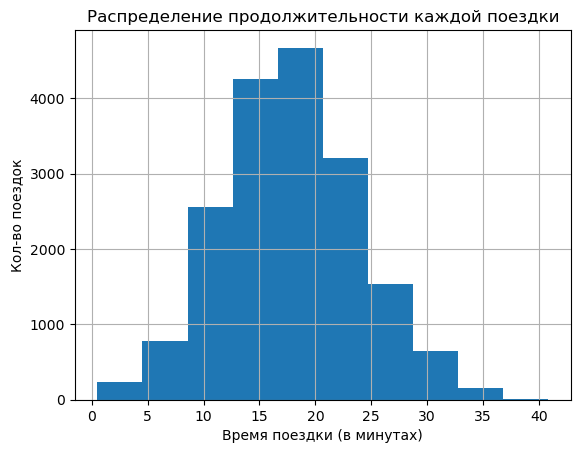

In [23]:
rides['duration'].hist() #гистограмма продолжительности поездок
plt.title('Распределение продолжительности каждой поездки')
plt.xlabel('Время поездки (в минутах)')
plt.ylabel('Кол-во поездок')

По диаграмме видно, что поездка в стреднем занимает 15-20 минут, распределение близко к нормальному.

#### Шаг 4. Объединение данных

Объединим данные в один датафрейм.

In [24]:
data = rides.merge(users, on='user_id', how='inner') #объединим пользователей и поездки по общему полю user_id
data.head(10) #проверим результат

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra


In [25]:
data = data.merge(subscriptions, on='subscription_type', how='inner') #объединим новый датафрейм data и данные о поездках по типу подписки
data.head(10) #проверим результат

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [26]:
data.info() #проверим размерность получившейся таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Размерность получившейся таблицы совпадает с данными исходных датафреймов, соединение прошло верно.

Создадим еще два датафрейма из общего, один будет содержать данные о пользователях с подпиской, другой - без.

In [27]:
subscription_free = data[data['subscription_type'] == 'free'] #отфильтруем данные о пользователях без подписки
subscription_free = subscription_free.reset_index(drop=True) 
subscription_free.head() #проверим результат

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [28]:
subscription_ultra = data[data['subscription_type'] == 'ultra'] #отфильтруем данные о пользователях с подпиской
subscription_ultra = subscription_ultra.reset_index(drop=True)
subscription_ultra.head() #проверим результат

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Построим для наглядности гистограммы для пользователей с подпиской и без.

Text(0, 0.5, 'Кол-во поездок')

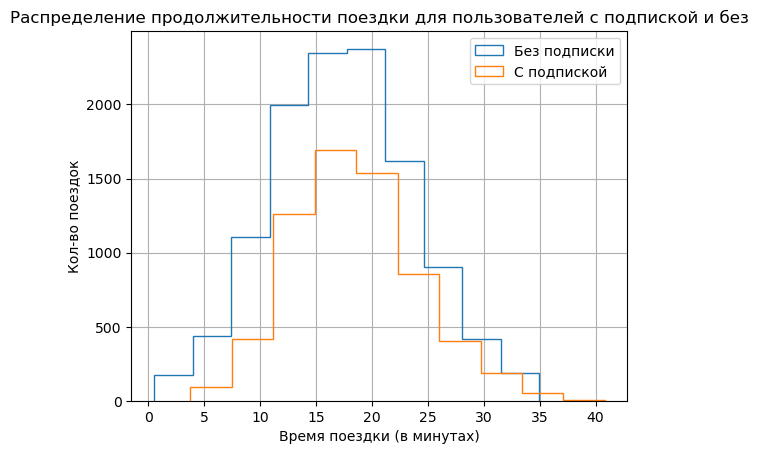

In [29]:
subscription_free['duration'].plot(kind='hist', histtype='step', label='Без подписки', legend=True, grid=True)
subscription_ultra['duration'].plot(kind='hist', histtype='step', label='С подпиской', legend=True, grid=True)
plt.title('Распределение продолжительности поездки для пользователей с подпиской и без')
plt.xlabel('Время поездки (в минутах)')
plt.ylabel('Кол-во поездок')

По диаграмме видно, что пользователи без подписки иногда совершают максимально короткие поездки (менее 5 минут), среди пользователей с подпиской минимальное время поездки больше, как и максимальное. В то время как среднее время поездки больше у пользователей без подписки.

Text(0, 0.5, 'Кол-во поездок')

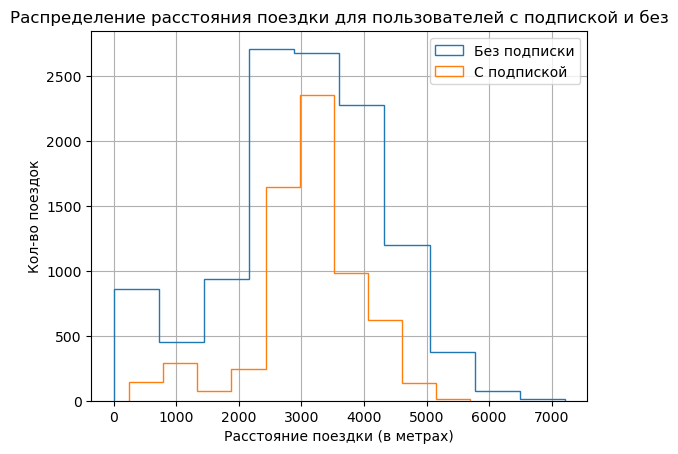

In [30]:
subscription_free['distance'].plot(kind='hist', histtype='step', label='Без подписки', legend=True, grid=True)
subscription_ultra['distance'].plot(kind='hist', histtype='step', label='С подпиской', legend=True, grid=True)
plt.title('Распределение расстояния поездки для пользователей с подпиской и без')
plt.xlabel('Расстояние поездки (в метрах)')
plt.ylabel('Кол-во поездок')

По диаграмме видно, что пользоваели с подпиской гораздо чаще проезжают расстояние 2.5-3.5 км, в остальнх случаях самокатами пользуются редко. А пользователи без подписки почти одинаково часто проезжают как 2, так и 4 км. Минимальное время поездки у пользователей без подписки меньше (около 0), а максимальное, наоборот больше (примерно 6.5 км против 5.5).

#### Шаг 5. Подсчёт выручки

Подсчитаем выручку каждого пользователя по месяцам. Для начала создадим сводную таблицу, где подсчитаем общее кол-во поездок, общую дистанцию и продолжительность поездок для каждого пользователя с разбивкой по месяцам.

In [31]:
data['duration'] = np.ceil(data['duration']) #округлим значения продолжительности поездки и перезапишем
main_rides_data = data.pivot_table(index=['user_id', 'month'], values=['distance', 'date', 'duration', 'start_ride_price', 'minute_price', 'subscription_fee', 'subscription_type'], aggfunc={
    'distance' : 'sum', 'date' : 'count', 'duration': 'sum', 'start_ride_price' : 'first', 'minute_price' : 'first', 'subscription_fee' : 'first', 'subscription_type' : 'first'}) #создадим сводную таблицу
main_rides_data.head(10) #проверим результат

date      distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1         2   7027.511294      42.0             6                 0   
        4         1    754.159807       7.0             6                 0   
        8         2   6723.470560      46.0             6                 0   
        10        2   5809.911100      32.0             6                 0   
        11        3   7003.499363      56.0             6                 0   
        12        2   6751.629942      28.0             6                 0   
2       3         3  10187.723006      63.0             6                 0   
        4         2   6164.381824      40.0             6                 0   
        6         1   3255.338202      14.0             6                 0   
        7         2   6780.722964      48.0             6                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra  
        12                  199             ultra  
2       3                   199             ultra  
        4                   199             ultra  
        6                   199             ultra  
        7                   199             ultra

In [32]:
main_rides_data =  main_rides_data.rename_axis(None, axis=1).reset_index() #сбросим индексы и иерархию индексов
main_rides_data.head(10) #проверим результат

,user_id,month,date,distance,duration,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,1,2,7027.511294,42.0,6,0,199,ultra
1,1,4,1,754.159807,7.0,6,0,199,ultra
2,1,8,2,6723.470560,46.0,6,0,199,ultra
3,1,10,2,5809.911100,32.0,6,0,199,ultra
4,1,11,3,7003.499363,56.0,6,0,199,ultra
5,1,12,2,6751.629942,28.0,6,0,199,ultra
6,2,3,3,10187.723006,63.0,6,0,199,ultra
7,2,4,2,6164.381824,40.0,6,0,199,ultra
8,2,6,1,3255.338202,14.0,6,0,199,ultra
9,2,7,2,6780.722964,48.0,6,0,199,ultra


Переименуем столбцы в соответствии с их смыслом:

In [33]:
main_rides_data.rename(columns = {'date' : 'count_ride', 'distance' : 'sum_distance', 'duration' : 'sum_duration'}, inplace = True)
main_rides_data.head()

,user_id,month,count_ride,sum_distance,sum_duration,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,1,2,7027.511294,42.0,6,0,199,ultra
1,1,4,1,754.159807,7.0,6,0,199,ultra
2,1,8,2,6723.470560,46.0,6,0,199,ultra
3,1,10,2,5809.911100,32.0,6,0,199,ultra
4,1,11,3,7003.499363,56.0,6,0,199,ultra


Расчитаем выручку для каждой строки таблицы и добавим в новую колонку.

In [34]:
main_rides_data['revenue'] = (main_rides_data['start_ride_price'] * main_rides_data['count_ride']) + (main_rides_data['minute_price'] * main_rides_data['sum_duration']) + main_rides_data['subscription_fee']
main_rides_data = main_rides_data[['user_id', 'month', 'count_ride', 'sum_distance', 'sum_duration', 'revenue', 'subscription_type']] #оставим в таблице только нужные данные
main_rides_data.head(10) #проверим результат

,user_id,month,count_ride,sum_distance,sum_duration,revenue,subscription_type
0,1,1,2,7027.511294,42.0,451.0,ultra
1,1,4,1,754.159807,7.0,241.0,ultra
2,1,8,2,6723.470560,46.0,475.0,ultra
3,1,10,2,5809.911100,32.0,391.0,ultra
4,1,11,3,7003.499363,56.0,535.0,ultra
5,1,12,2,6751.629942,28.0,367.0,ultra
6,2,3,3,10187.723006,63.0,577.0,ultra
7,2,4,2,6164.381824,40.0,439.0,ultra
8,2,6,1,3255.338202,14.0,283.0,ultra
9,2,7,2,6780.722964,48.0,487.0,ultra


#### Шаг 6. Проверка гипотез

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

За нулевую гипотезу примем утверждение, что "пользователи с подпиской и без тратят одинаковое количество времени на поездки". В качестве альтернативной гипотезы рассмотрим утверждение о том, что "пользователи с подпиской тратят больше времени на поездки, чес пользователи без подписки".

In [35]:
alpha = 0.05 #зададим порог отбрасывания нулевой гипотезы
#подсчитаем верояиность того, что нулевая гипотеза может быть верна
results = st.ttest_ind(subscription_ultra['duration'], subscription_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)
#сравним полченное значение с пороговым
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть основания полагать, что пользователи с подпиской тратят большее количество времени на поездки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: возможно, пользователи с подпиской и без тратят примерно одинаковое количество времени на поездки')
    
print('Средняя продолжительность поездки для пользователей с подпиской составляет', subscription_ultra['duration'].mean())
print('Средняя продолжительность поездки для пользователей без подписки составляет', subscription_free['duration'].mean())

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу: есть основания полагать, что пользователи с подпиской тратят большее количество времени на поездки
Средняя продолжительность поездки для пользователей с подпиской составляет 18.54198516280583
Средняя продолжительность поездки для пользователей без подписки составляет 17.39090929866399


Судя по полученным результатам, гипотеза о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки, может быть верна. Средние значения в каждой категории это подтверждают.

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

За нулевую гипотезу примем, что пользователи с подпиской за одну поездку проезжают расстояние, не превышающее 3130 метров, за альтернативную, что это расстояние больше 3130 метров.

In [36]:
interested_value = 3130

alpha = 0.05 #зададим порог отбрасывания нулевой гипотезы
#подсчитаем верояиность того, что нулевая гипотеза может быть верна
results = st.ttest_1samp(subscription_ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)
#сравним полченное значение с пороговым
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: расстояние больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние не превышает 3130 метров')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние не превышает 3130 метров


Судя по полученным данным, так и есть, и пользователи укладываются в оптимальное расстояние.

3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

За нулевую гипотезу примем утверждение о том, что пользователи с подпиской и без приносят примерно одинаковое количество денег, за альтернативну - выручка от пользователей с подпиской больше. Проверим гипотезы.

In [37]:
alpha = 0.05 #зададим порог отбрасывания нулевой гипотезы
#отфильтруем данные о пользователях с подпиской и без
results = st.ttest_ind(main_rides_data.loc[main_rides_data['subscription_type'] == 'ultra', 'revenue'], main_rides_data.loc[main_rides_data['subscription_type'] == 'free', 'revenue'], alternative='greater')

print('p-значение:', results.pvalue)
#сравним полченное значение с пороговым
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть основания полагать, что пользователи с подпиской приносят больше денег, чем пользователи без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: возможно, выручка от пользователей с подпиской и без примерно одинаковая')
    
print('Среднее значение выручки для пользователей с подпиской составляет', main_rides_data.loc[main_rides_data['subscription_type'] == 'ultra', 'revenue'].mean())
print('Среднее значение выручки для пользователей без подписки составляет', main_rides_data.loc[main_rides_data['subscription_type'] == 'free', 'revenue'].mean())

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: есть основания полагать, что пользователи с подпиской приносят больше денег, чем пользователи без подписки
Среднее значение выручки для пользователей с подпиской составляет 362.7921906022502
Среднее значение выручки для пользователей без подписки составляет 328.6413651073845


Полученные результаты позволяют думать, что альтернативная гипотеза может быть верна и пользователи с подпиской действительно приносят выручку больше, чем пользователи без подписки. Средние значения выручки по каждой категории пользователей это так же подтверждают.

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: для проверки такой гипотезы нам понадобился бы метод `stats.ttest_rel()`. С помощью него можно проверить гипотезы, основанные на зависимых друг от друга данных.

### Вывод:

Целью данного проекта являлось изучить данные сервиса аренды самокатов, проанализировать их и подтвердить или опровергнуть некоторые гипотезы.

На этапе предобработки данных были преобразованы типы данных (дату привели к тику datetime), удалены дубликаты и выполнена проверка на неявные дубликаты.

Далее изучили полученные данные и сделали промежуточные выводы:
1. Города в данных распредены примерно одинаково.
2. Пользователи без подписки пользуются сервисом немного чаще.
3. Чаще всего сервисом пользуются люди возрастом 22-28 лет и реже подростки и люди старше 35 лет, распределение близко к нормальному.
4. Наиболее часто пользователи проезжают на самокатах 2.5-4 км. Реже всего самокаты используют для аренды на дальние расстояния.
5. Поездка в стреднем занимает 15-20 минут, распределение близко к нормальному.

Для проверки гипотез данные были объединены, создана сводная таблица с подсчетом агрегированных данных, расчитана выручка для каждого пользователя по месяцам.

При проверке гипотез были получены следующие результаты:
1. Гипотеза о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки, может быть верна.
2. Пользователи укладываются в оптимальное расстояние 3130 метров за одну поездку.
3. Пользователи с подпиской действительно могут приносить выручку больше, чем пользователи без подписки.